# Report - Relationship between the R&D Expenditure and Employees from Abroad in Netherlands.
**Muhammad Naeem Ur Rehman** <br>
**09th December 2023**

## Preparation

### Install Dependencies

In [1]:
%pip install pandas
%pip install geopandas
%pip install plotly
%pip install nbformat
%pip install matplotlib
%pip install cbsodata
%pip install time
%pip install 'SQLAlchemy==1.4.46'

Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement time (from versions: none)
ERROR: No matching distribution found for time


Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: "'SQLAlchemy==1.4.46'"


### Import Modules

In [3]:
import os
import subprocess
import urllib.request
import zipfile
import geopandas as gpd
import numpy as np
from scipy.stats import pearsonr
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sqlite3
import cbsodata
import time
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Load Data

In [9]:
# If database doesn't exist, run datapipeline to create it
if not os.path.exists("../data/employees_data.sqlite") or not os.path.exists("../data/R&D_Expenditure.sqlite"):
    print("Entered running pipeline")
    subprocess.run(["python", "pipeline.py"])

# Load data from database
con1 = create_engine('sqlite:///../data/employees_data.sqlite')
con2 = create_engine('sqlite:///../data/R&D_Expenditure.sqlite')
df1 = pd.read_sql_table('employees', con1)
df2 = pd.read_sql_table('R&D_Expenditure', con2)
print("Loaded Data successfully")

Loaded Data successfully


### Check Data


In [10]:
df1.head()

,Year,Number of employees from abroad
0,2013,697700.0
1,2014,702800.0
2,2015,732100.0
3,2016,769700.0
4,2017,838100.0


In [24]:
df2.head()

,Year,Total R&D Employees,Total R&D Expenditure
0,2013,146165,9299000000
1,2014,144689,9444000000
2,2015,151385,9515000000
3,2016,157018,10008000000
4,2017,157844,10667000000


In [12]:
# Amount spent as R&D expenditure is given in terms of Millions. so, it means 9299 means 9299000000 So modifying the actual values
df2['Total R&D Expenditure'] *= 1000000

# Introduction

### Motivation
It has been seen in recent years that the rate of increase in employees from abroad has increased in Europe especially Germany, Netherlands, and France Especially in the field of IT and Software.
<br>
For this reason, it would be interessting to see, if a higher amount of R&D expenditure correlates with a higher number of employees from aborad in Netherlands.

### Goal
The aim of this project is to identify and analyze how much of the overall increased rate of employees from abroad is related to the overall increase of R&D expenditure in in Netherlands, With the help of the data aquired from companies working in Netherland.The goal is also to build a machine learning model which can predict the number of employees with the given amount of R&D Expenditure budget that Netherlands can allocate in near future if they want to attract more International employees to the country. Also how is each company's expenditure on R&D in Netherland related to the employees from abroad in the specific comapny (Not included in this report). 
<br><br>
In the end, This project draws connections between the R&D Expenditure and employees working in the country who are from abroad in Netherland and shed light on whether increase in R&D expenditure will lead to an increase in overall employees from abroad.

# Methods

### Datasources
Here a short listing of the used datasources. For a more detailed insight of data you can check out the [Know_data_sources.ipynb](https://github.com/Malik-Naeem-Awan/made-project-FAU/blob/main/project/Know_data_sources.ipynb) notebook.

* **Datasource1:** Employees from abroad in Netherlands
    •	Provided by: European Data Portal

    •	Metadata URL: https://data.europa.eu/data/datasets/4308-employees-from-abroad-resident-non-resident-demographic-variables?locale=en

    •	Download URLs: https://opendata.cbs.nl/ODataFeed/odata/84060ENG/TypedDataSet?%24format=json&%24filter=EmployeeWithWithoutRegistration+eq+%27T001391%27+and+EmployeeCharacteristics+eq+%27T001097%27
    https://opendata.cbs.nl/statline/#/CBS/en/dataset/84985ENG/table?dl=9949A

    •	Data Format: CSV Employees from abroad;resident/non-resident,demographic variables,2010-2017
<br><br>
* **Datasource2:** Employees from abroad in Netherlands
    •	Provided by: European Data Portal

    •	Metadata URL: https://data.europa.eu/data/datasets/15702-research-and-development-personnel-expenditure-company-size-branch?locale=en

    •	Download URL: https://opendata.cbs.nl/statline/#/CBS/en/dataset/84985ENG/table?dl=9949A

    •	Data Format: CSV Netherland's Research and development; personnel, expenditure, company size, branch, 2013-2017.
    
### why we used the two datasources for our project goal
It has been seen in recent years that the rate of increase in employees from abroad has increased in Europe especially Germany, Netherlands, and France.
The data for total employees from abroad in Netherlands and data for overall R&D expenditure of Netherlands is easly accessible and clearly available through the cbsoda API that the CBS Netherlands provides. This data helps us to answer the topic questions of interest for this project we are working on.


### Data Transformation
The entire data transformation process takes place in the [project/pipeline.py](https://github.com/Malik-Naeem-Awan/made-project-FAU/blob/main/project/pipeline.py) file.
There the above mentioned datasources get loaded from the internet, cleaned, combined and stored in an sqlite-database. 
<br> <br>
The resulting two databases consist of two tables "employees" and "R&D_Expenditure":
* **employees:** Contains for each year from 2010 to 2027, The number of employees from abroad by each year in Netherlands.

* **R&D_Expenditure:** Contains for each year from 2010-2017, Netherland's Research and development expenditure and number of R&D employees.

# Analysis & Results

### Number of employees from abroad and R&D Expenditure over the years
First let's have a look at the development over the time.

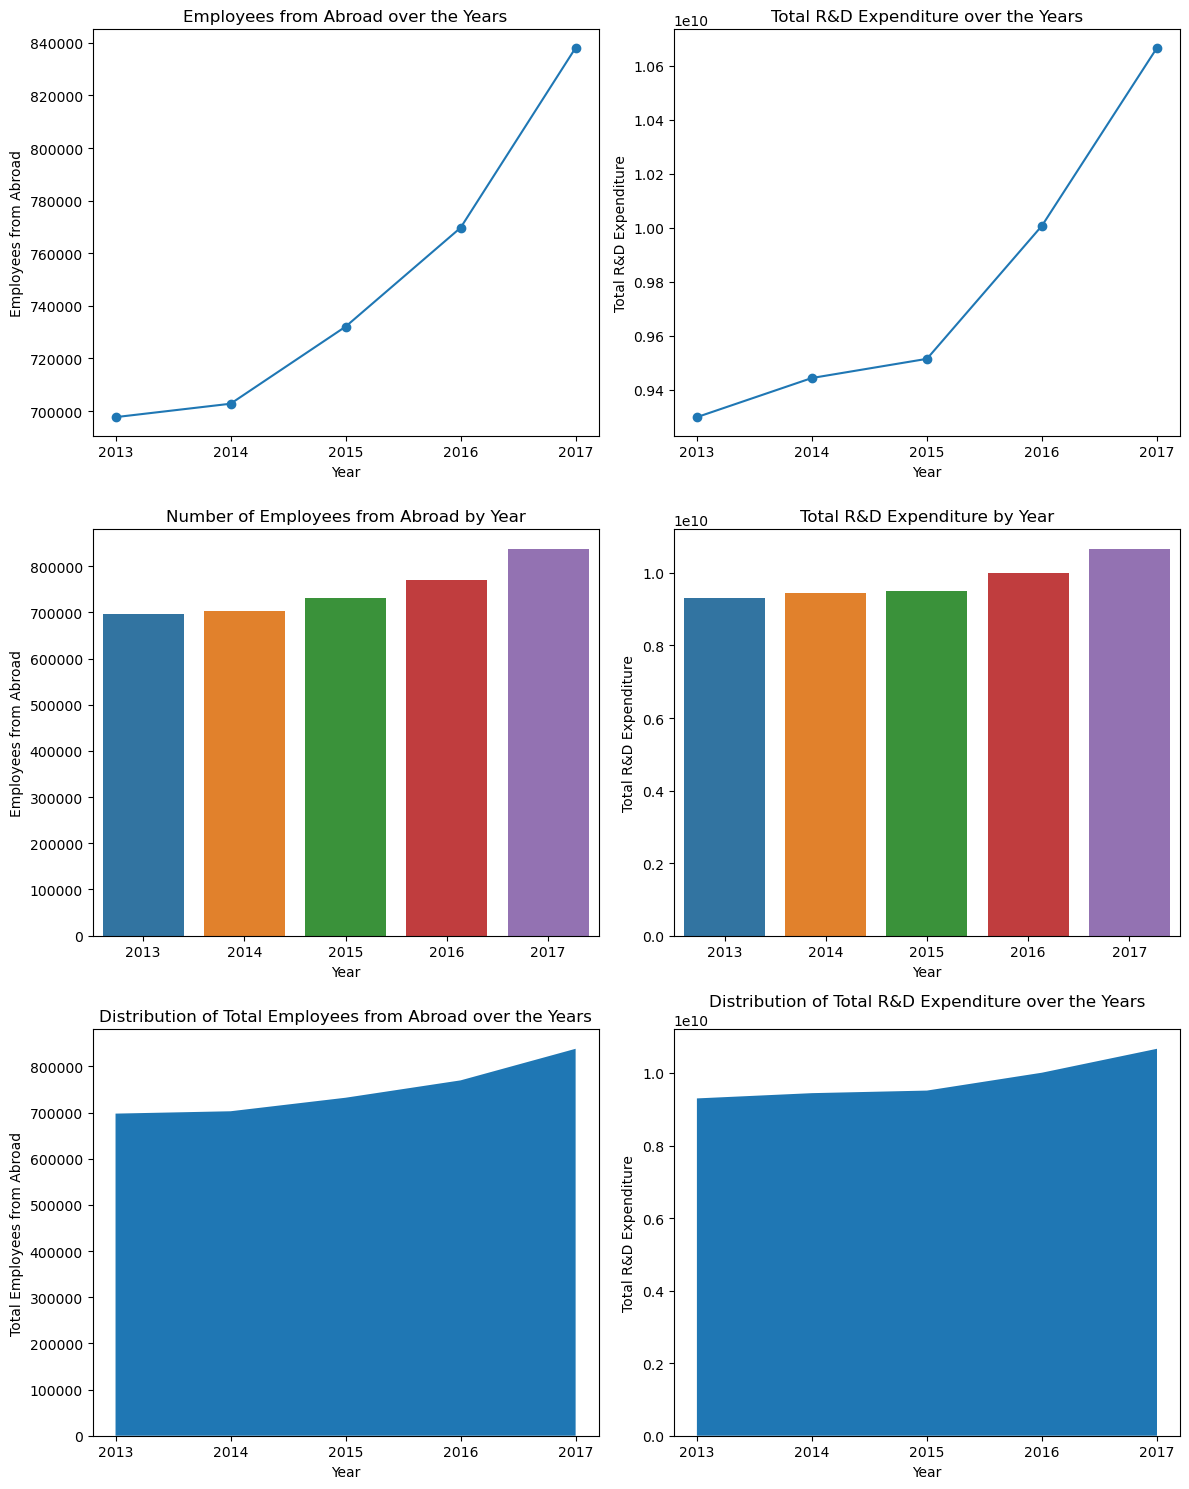

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creating subplots with a grid layout of 3 rows and 2 columns
fig, axes = plt.subplots(3, 2, figsize=(12, 15))

# Plotting the first two graphs in the first row
axes[0, 0].plot(df1['Year'], df1['Number of employees from abroad'], marker='o')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Employees from Abroad')
axes[0, 0].set_title('Employees from Abroad over the Years')

axes[0, 1].plot(df2['Year'], df2['Total R&D Expenditure'], marker='o')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Total R&D Expenditure')
axes[0, 1].set_title('Total R&D Expenditure over the Years')

# Plotting the next two graphs in the second row
sns.barplot(data=df1, x='Year', y='Number of employees from abroad', ax=axes[1, 0])
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Employees from Abroad')
axes[1, 0].set_title('Number of Employees from Abroad by Year')

sns.barplot(data=df2, x='Year', y='Total R&D Expenditure', ax=axes[1, 1])
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('Total R&D Expenditure')
axes[1, 1].set_title('Total R&D Expenditure by Year')

# Plotting the last two area plots in the third row
axes[2, 0].stackplot(df1['Year'], df1['Number of employees from abroad'])
axes[2, 0].set_xlabel('Year')
axes[2, 0].set_ylabel('Total Employees from Abroad')
axes[2, 0].set_title('Distribution of Total Employees from Abroad over the Years')

axes[2, 1].stackplot(df2['Year'], df2['Total R&D Expenditure'])
axes[2, 1].set_xlabel('Year')
axes[2, 1].set_ylabel('Total R&D Expenditure')
axes[2, 1].set_title('Distribution of Total R&D Expenditure over the Years')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

As you can see in the graphic on the left the percentage share of Employees from abroad are increasing, especially in recent years. <br>
The same applies for the R&D Expenditure in Netherlands. They are steadily increasing and especially in recent years with a much higher slope than in the early years. <br>
<br>
However, to assume a dependency here would be too vague. There are a lot of factors which also effect these increases, especially the change in society and the industry over the time.
<br><br>
So its hard to argue that the R&D Expenditure influence the Total employees form abroad in Netherlands, just because both values are rapidly increasing over time. <br>
For this reason, we now will try to find out the correlation between R&D Expenditure abd the Total employees form abroad in Netherlands.

#### Converting columns of data to numeric data for coorelation

In [15]:
# Convert columns to numeric type
# Convert columns to numeric type
df1.reset_index(drop=True, inplace=True)
df2.reset_index(drop=True, inplace=True)
df1['Number of employees from abroad'] = pd.to_numeric(df1['Number of employees from abroad'], errors='coerce')
df2['Total R&D Expenditure'] = pd.to_numeric(df2['Total R&D Expenditure'], errors='coerce')

print(df1['Number of employees from abroad'], df2['Total R&D Expenditure'])
# Calculate correlation between the columns
correlation = df1['Number of employees from abroad'].corr(df2['Total R&D Expenditure'])

print(f"Correlation between 'Number of employees from abroad' and 'Total R&D Expenditure': {correlation}")

0    697700.0
1    702800.0
2    732100.0
3    769700.0
4    838100.0
Name: Number of employees from abroad, dtype: float64 0     9299000000
1     9444000000
2     9515000000
3    10008000000
4    10667000000
Name: Total R&D Expenditure, dtype: int64
Correlation between 'Number of employees from abroad' and 'Total R&D Expenditure': 0.9908151546317109


In [16]:
# Renaming to make it easy for handling in next steps
df1_from_2013_to_2017= df1
df2_from_2013_to_2017= df2                                         

### Correlation between 'Number of employees from abroad' and 'Total R&D Expenditure' 

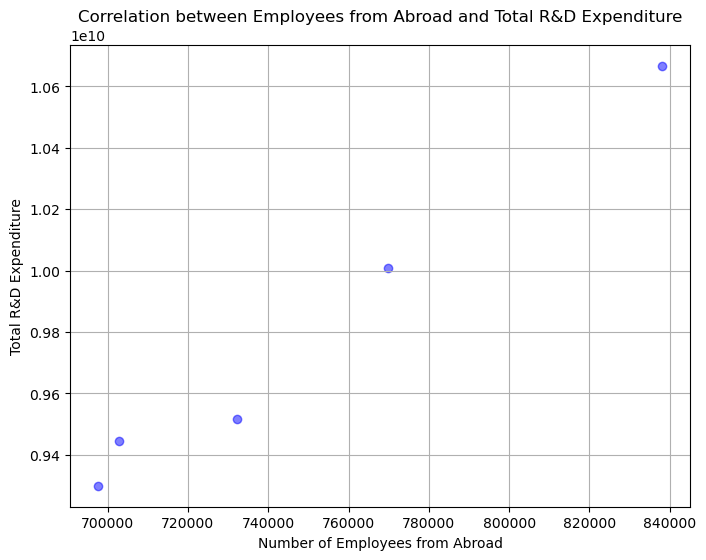

In [17]:
import matplotlib.pyplot as plt

# Assuming the previous code for data manipulation and correlation calculation is already executed
# Plotting the correlation using a scatter plot  df['Year'] >= 2013) & (df['Year'] <= 2017
plt.figure(figsize=(8, 6))
plt.scatter(df1_from_2013_to_2017['Number of employees from abroad'], df2_from_2013_to_2017['Total R&D Expenditure'], color='blue', alpha=0.5)
plt.title('Correlation between Employees from Abroad and Total R&D Expenditure')
plt.xlabel('Number of Employees from Abroad')
plt.ylabel('Total R&D Expenditure')
plt.grid(True)
plt.show()

## Merge data to Find correlation

In [18]:
merged_df = pd.merge(df1_from_2013_to_2017, df2_from_2013_to_2017, on='Year')

### Correlation HeatMap:

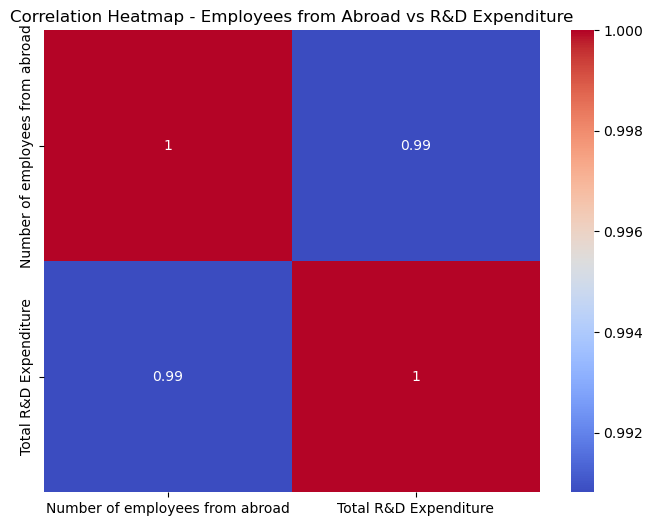

In [19]:
selected_cols = ['Number of employees from abroad', 'Total R&D Expenditure']
correlation_matrix = merged_df[selected_cols].corr()

# Heatmap for selected columns
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Employees from Abroad vs R&D Expenditure')
plt.show()

### Pair plot

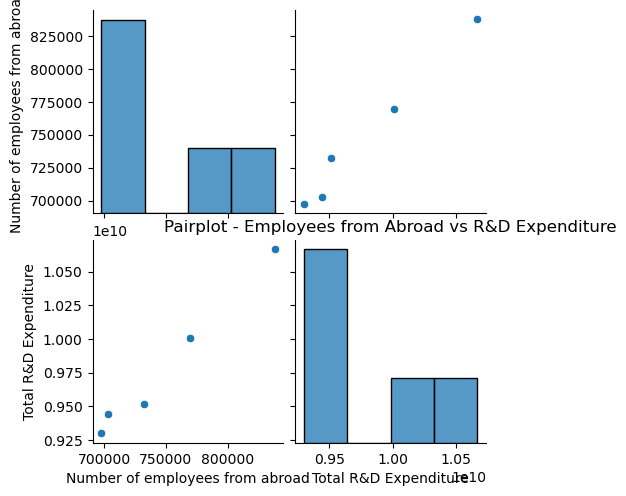

In [20]:
sns.pairplot(merged_df[['Number of employees from abroad', 'Total R&D Expenditure']])
plt.title('Pairplot - Employees from Abroad vs R&D Expenditure')
plt.show()

### Regression plot

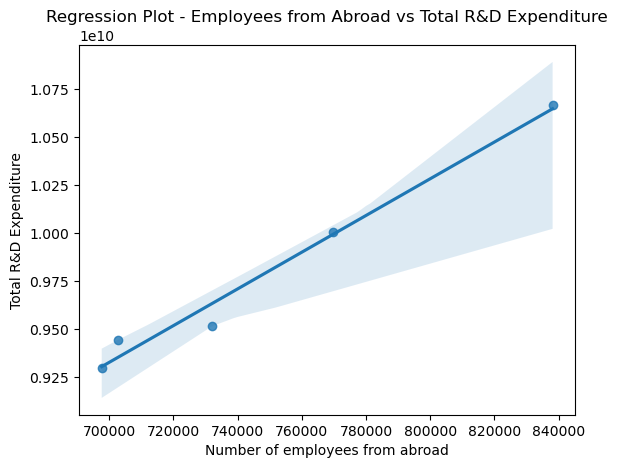

Correlation coefficient: 0.9908151546317109


In [21]:
sns.regplot(x='Number of employees from abroad', y='Total R&D Expenditure', data=merged_df)
plt.title('Regression Plot - Employees from Abroad vs Total R&D Expenditure')
plt.show()

print(f"Correlation coefficient: {correlation}")

So Above Correlation coefficient shows a strong correlation between R&D Expenditure and Employees from abroad.
<br><br>
In the next chapter, we will use data to train the machine learning model and try to predict the values for future.

## Train Linear Regression Model to Preduct for future

In [22]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Assuming df1 and df2 are your provided DataFrames
# Combine the two DataFrames
df_merged = pd.merge(df1_from_2013_to_2017, df2_from_2013_to_2017, on='Year')

# Extracting features and target variable
X = df_merged[['Total R&D Expenditure']]
y = df_merged['Number of employees from abroad']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting 'employees from abroad' based on 'Total R&D Expenditure'
y_pred = model.predict(X_test)

In [29]:
# Function to predict employees from abroad for a given R&D Expenditure
def predict_employees_from_expenditure(expenditure):
    # Reshape the input for prediction as the model expects a 2D array
    expenditure_input = [[expenditure]]
    
    # Predict the number of employees from abroad for the given expenditure
    employees_predicted = model.predict(expenditure_input)
    return employees_predicted[0]

# Example prediction for R&D Expenditure (change 'given_expenditure' to the desired value)
given_expenditure = 12667000000  # R&D Expenditure twelve billion six hundred sixty-seven million.
predicted_employees = predict_employees_from_expenditure(given_expenditure)
#predicted_employees = int(predicted_employees)
print(f"For an R&D Expenditure of {given_expenditure}, the predicted number of employees from abroad is: {int(predicted_employees)}")

For an R&D Expenditure of 12667000000, the predicted number of employees from abroad is: 1034928


In [30]:
import pandas as pd
from sklearn.linear_model import LinearRegression


df_employees_abroad = pd.DataFrame(df1)
df_rnd_expenditure = pd.DataFrame(df2)

# Training a model to predict 'Number of employees from abroad' based on 'Total R&D Expenditure'
X_employees = df_merged[['Total R&D Expenditure']]
y_employees = df_merged['Number of employees from abroad']

model_employees = LinearRegression()
model_employees.fit(X_employees, y_employees)
#9299000000
# Predicting 'Number of employees from abroad' for a given 'Total R&D Expenditure'
rnd_expenditure_values = [[9500000000], [11000000000]]  # Examples of Total R&D Expenditure values to predict employees abroad
predicted_employees = model_employees.predict(rnd_expenditure_values)

for rnd, employees in zip(rnd_expenditure_values, predicted_employees):
    print(f"Predicted number of employees from abroad for Total R&D Expenditure {rnd[0]}: {int(employees)}")

# Training a model to predict 'Total R&D Expenditure' based on 'Number of employees from abroad'
X_rnd = df_employees_abroad[['Number of employees from abroad']]
y_rnd = df_rnd_expenditure['Total R&D Expenditure']

model_rnd = LinearRegression()
model_rnd.fit(X_rnd, y_rnd)

# Predicting 'Total R&D Expenditure' for a given 'Number of employees from abroad'
employees_values = [[900000], [1000000]]  # Examples of employees abroad values to predict R&D Expenditure
predicted_rnd = model_rnd.predict(employees_values)

for employees, rnd in zip(employees_values, predicted_rnd):
    print(f"Predicted Total R&D Expenditure for {employees[0]} employees from abroad: {int(rnd)}")


Predicted number of employees from abroad for Total R&D Expenditure 9500000000: 718697
Predicted number of employees from abroad for Total R&D Expenditure 11000000000: 872477
Predicted Total R&D Expenditure for 900000 employees from abroad: 11241368463
Predicted Total R&D Expenditure for 1000000 employees from abroad: 12198956973


In [31]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


model_decision_tree = DecisionTreeRegressor(random_state=42)
model_decision_tree.fit(X_employees, y_employees)

# Predicting 'Number of employees from abroad' for given 'Total R&D Expenditure' with Decision Tree
predicted_employees_dt = model_decision_tree.predict(rnd_expenditure_values)

for rnd, employees in zip(rnd_expenditure_values, predicted_employees_dt):
    print(f"Predicted number of employees from abroad (Decision Tree) for Total R&D Expenditure {rnd[0]}: {int(employees)}")

# Training with Random Forest Regressor
model_random_forest = RandomForestRegressor(random_state=42)
model_random_forest.fit(X_employees, y_employees)

# Predicting 'Number of employees from abroad' for given 'Total R&D Expenditure' with Random Forest
predicted_employees_rf = model_random_forest.predict(rnd_expenditure_values)

for rnd, employees in zip(rnd_expenditure_values, predicted_employees_rf):
    print(f"Predicted number of employees from abroad (Random Forest) for Total R&D Expenditure {rnd[0]}: {int(employees)}")

# Training with Decision Tree Regressor for predicting 'Total R&D Expenditure' based on 'Number of employees from abroad'
model_decision_tree_rnd = DecisionTreeRegressor(random_state=42)
model_decision_tree_rnd.fit(X_rnd, y_rnd)

# Predicting 'Total R&D Expenditure' for given 'Number of employees from abroad' with Decision Tree
predicted_rnd_dt = model_decision_tree_rnd.predict(employees_values)

for employees, rnd in zip(employees_values, predicted_rnd_dt):
    print(f"Predicted Total R&D Expenditure (Decision Tree) for {employees[0]} employees from abroad: {int(rnd)}")

# Training with Random Forest Regressor for predicting 'Total R&D Expenditure' based on 'Number of employees from abroad'
model_random_forest_rnd = RandomForestRegressor(random_state=42)
model_random_forest_rnd.fit(X_rnd, y_rnd)

# Predicting 'Total R&D Expenditure' for given 'Number of employees from abroad' with Random Forest
predicted_rnd_rf = model_random_forest_rnd.predict(employees_values)

for employees, rnd in zip(employees_values, predicted_rnd_rf):
    print(f"Predicted Total R&D Expenditure (Random Forest) for {employees[0]} employees from abroad: {int(rnd)}")


Predicted number of employees from abroad (Decision Tree) for Total R&D Expenditure 9500000000: 732100
Predicted number of employees from abroad (Decision Tree) for Total R&D Expenditure 11000000000: 838100
Predicted number of employees from abroad (Random Forest) for Total R&D Expenditure 9500000000: 723087
Predicted number of employees from abroad (Random Forest) for Total R&D Expenditure 11000000000: 810874
Predicted Total R&D Expenditure (Decision Tree) for 900000 employees from abroad: 10667000000
Predicted Total R&D Expenditure (Decision Tree) for 1000000 employees from abroad: 10667000000
Predicted Total R&D Expenditure (Random Forest) for 900000 employees from abroad: 10397150000
Predicted Total R&D Expenditure (Random Forest) for 1000000 employees from abroad: 10397150000


## Conclusion
The analysis shows that the ratio of Number of Employees from Abroad in Netherlands is increasing steadily. This mainly is caused by Increase in R&D Expenditure of Netherlands collectively.
So to find a relationship between the 
So to find a relationship between the increase in number of employees from abroad and increase in R&D Expenditure, we primarily examined the Correlation coefficient: 0.9908151546317109. 
Here we noticed a good correlation between the R&D Expenditure and employees from abroad. This correlation was especially strong between the years 2016 and 2017 due to the swift increase. <br>
From this findings you could conclude that a higher R&D Expenditure of a country, causes a higher willingness of people coming from abroad as employees, especially in industry where there is skill shortage in order to fill that gap.
<br>
We also trained a Linear Regression model on these data points which is able to predict For an R&D Expenditure of 12667000000, the resulting number of employees from abroad is: 1034928.
<br>
Predicted number of employees from abroad for Total R&D Expenditure 9500000000: 718697
<br>
Predicted number of employees from abroad for Total R&D Expenditure 11000000000: 872477
<br>
Predicted Total R&D Expenditure for 900000 employees from abroad: 11241368463:864708
<br>
Predicted Total R&D Expenditure for 1000000 employees from abroad: 12198956973:517624
<br>
The Random Forest and Decision Tree regressors are also trained using the data in order to predict the future values. The show the results as:
<br>
Predicted number of employees from abroad (Decision Tree) for Total R&D Expenditure 9500000000: 732100
<br>
Predicted number of employees from abroad (Decision Tree) for Total R&D Expenditure 11000000000: 838100
<br>
Predicted number of employees from abroad (Random Forest) for Total R&D Expenditure 9500000000: 723087
<br>
Predicted number of employees from abroad (Random Forest) for Total R&D Expenditure 11000000000: 810874
<br>
Predicted Total R&D Expenditure (Decision Tree) for 900000 employees from abroad: 10667000000
<br>
Predicted Total R&D Expenditure (Decision Tree) for 1000000 employees from abroad: 10667000000
<br>
Predicted Total R&D Expenditure (Random Forest) for 900000 employees from abroad: 10397150000
<br>
Predicted Total R&D Expenditure (Random Forest) for 1000000 employees from abroad: 10397150000

<br><br>
### Limitations
But we also have to mention that we only used 5 values for calculating this correlation and doesn't consider other influential factors which could cause this to be a spurious correlation ("Scheinkorrelation"). 
<br><br>
### Outlook to Future
In future works you should consider using more datapoint, for example by using data for several countries throughout europe or spliting up the data of Netherlands into more smaller Sectors of industry. Also, like mentioned, you should consider other factors which could influence these values, like the Skilled labor shortage in specific industry, the average salary of an employee in specific sector, Country of origin of employees from abroad ,the amount of money by the state spends on R&D in specific required industries, etc.
<br><br>
### Final Verdict
Nevertheless, this project provides interessting findings on the relationship between the number of employees from abroad and R&D Expenditure in Netherlands. <br>
It's important to understand how the above correlation influence a country's plan to fill the skilled force or labor gap in near future quickly, so that the Country can steer its future in a productive and more sustainable direction.